---
title: Discontinuities examples
---

In [7]:
#| echo: false
#| output: false
%load_ext autoreload
%autoreload 2

In [41]:

#| echo: false
#| output: false
from juno.config import JunoConfig
import polars as pl
from datetime import timedelta
from discontinuitypy.utils.plot import plot_candidates
from beforerr.project import plotsdir
from beforerr.matplotlib import hide_fig_legend, hide_y_axes_label

## Discontinuities in different AU from Juno

In [9]:
# | export
from importlib.util import find_spec
import matplotlib.pyplot as plt

if find_spec("scienceplots"):
    import scienceplots as scienceplots
    plt.style.use(["science", "nature", "notebook"])

In [10]:
j_config = JunoConfig().find_events()
events = j_config.events.with_columns(pl.col("radial_distance").round())

shape: (1, 92)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬───────────┬───────────┐
│ time      ┆ tstart    ┆ tstop     ┆ t.d_end   ┆ … ┆ v.ion.cha ┆ B.change ┆ v.Alfven. ┆ v.Alfven. │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ nge.l     ┆ ---      ┆ change    ┆ change.l  │
│ datetime[ ┆ datetime[ ┆ datetime[ ┆ datetime[ ┆   ┆ ---       ┆ f64      ┆ ---       ┆ ---       │
│ ns]       ┆ ns]       ┆ ns]       ┆ ns]       ┆   ┆ f64       ┆          ┆ f64       ┆ f64       │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪═══════════╪═══════════╡
│ 2011-08-2 ┆ 2011-08-2 ┆ 2011-08-2 ┆ 2011-08-2 ┆ … ┆ NaN       ┆ 0.238196 ┆ NaN       ┆ NaN       │
│ 5         ┆ 5         ┆ 5         ┆ 5 15:25:4 ┆   ┆           ┆          ┆           ┆           │
│ 15:25:30  ┆ 15:25:00  ┆ 15:26:00  ┆ 4.503     ┆   ┆           ┆          ┆           ┆           │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴──────────┴───────────┴───────────┘

2024-07-12 12:09:11.502 | INFO     | discontinuitypy.utils.plot:plot_candidates:265 - Candidates indices: [0]


12-Jul-24 12:09:12: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.

2024-07-12 12:09:12.312 | INFO     | discontinuitypy.utils.plot:plot_candidates:265 - Candidates indices: [66480]
12-Jul-24 12:09:12: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced b

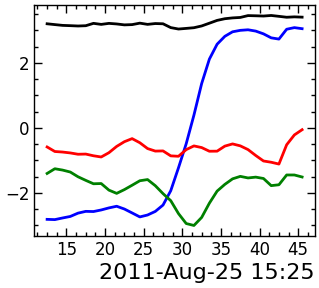

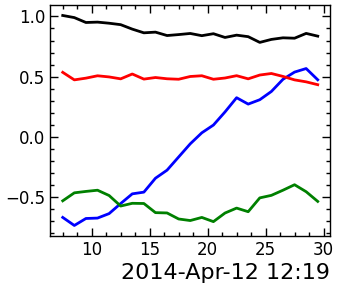

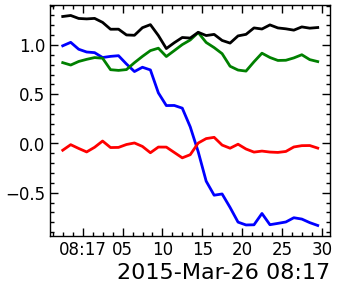

In [42]:
predicate = [
    pl.col("index_diff") > 1,
    pl.col("db_over_b_max") < 0.3,
]
rs = [1, 3, 5]

figure_opts = {
    "figwidth": 3.3,
    "figheight": 3,
}
fmt = "svg"

for r in rs:
    temp_predicate = predicate + [pl.col("radial_distance").round() == r]
    fig, ax = plot_candidates(
        j_config,
        predicate=temp_predicate,
        num=1,
        random=False,
        add_ids_properties=False,
        add_timebars=False,
    )[0]
    
    path = plotsdir() / "examples" / f"juno_id_example_r={r}.{fmt}"
    
    hide_fig_legend(fig)
    hide_y_axes_label(ax)
    fig.set(**figure_opts)
    fig.savefig(path)

# Strong current density in 5AU

## Strong current density in 5AU from derivative method

Large derivative current density but small when using fitting

In [65]:
j_config = JunoConfig(ts=0.125)
j_fit_config = JunoConfig(ts=0.125).load()
j_der_config = JunoConfig(ts=0.125, method='derivative').load()

print(
    len(j_fit_config.events),
    len(j_der_config.events)
)

j_config.events = j_fit_config.events.join(j_der_config.events, on='time').with_row_index()
print(len(j_config.events))

j_config.events = j_config.events.filter(
    pl.col("radial_distance") > 5,
    pl.col("j0_k_right") > 3
)
print(len(j_config.events))

# j_fit_config.events.join(j_der_config.events, on='time')

72656 94095
156532
1168


04-Mar-24 15:57:37: deriv_data was applied to: fgm_rot_tot_0-der
04-Mar-24 15:57:37: deriv_data was applied to: fgm_rot_tot_0-der
04-Mar-24 15:57:38: deriv_data was applied to: fgm_rot_tot_0-der


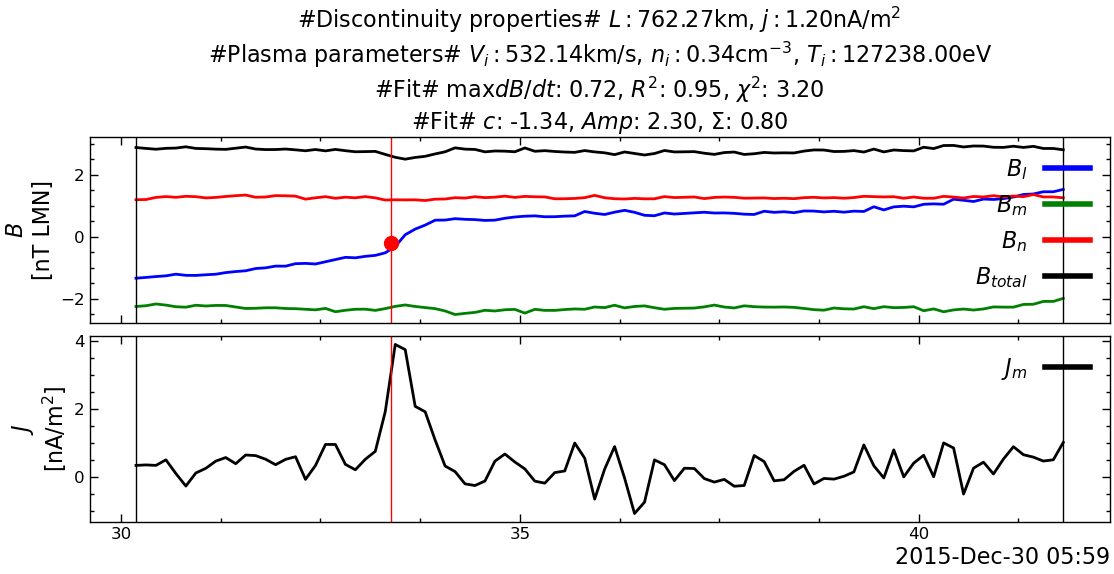

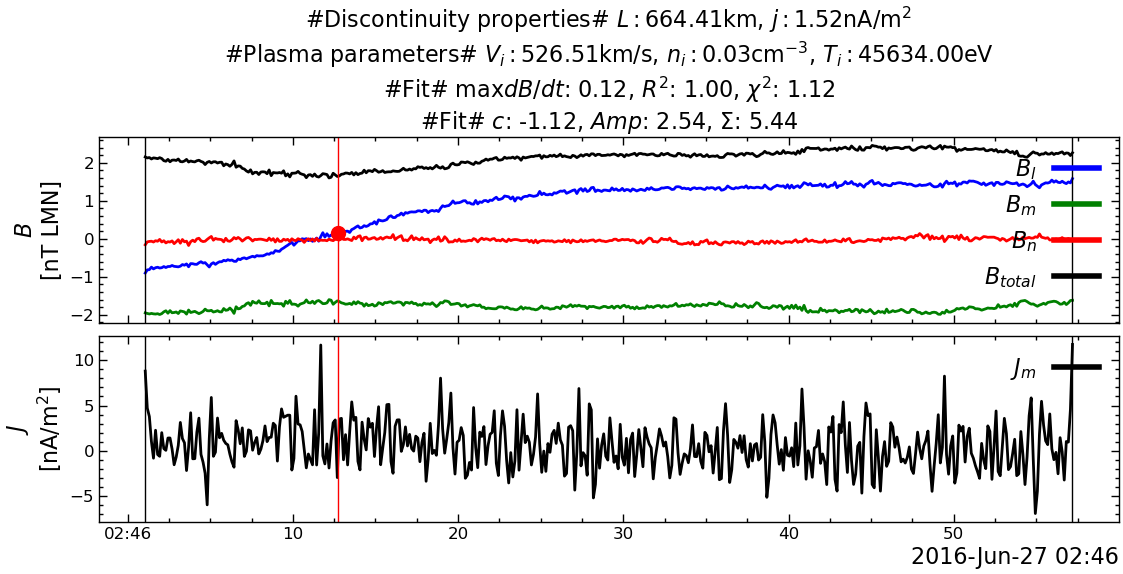

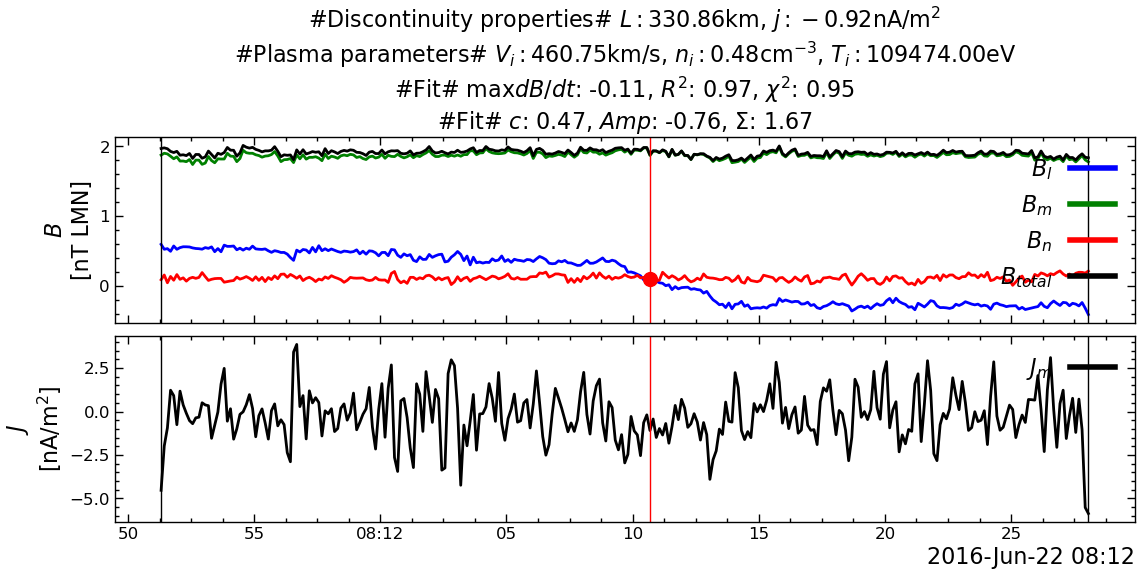

In [78]:
# | layout-ncol: 3
# | column: screen
indices = [153101, 156356, 156046]
offset = timedelta(seconds=0)
figs = j_config.plot_candidates(
    indices=indices,
    offset=offset,
    add_plasma_params=True,
    plot_current_density=True,
    plot_fit_data=True,
)

#### Random picking

2024-03-04 15:57:07.447 | INFO     | discontinuitypy.datasets:plot_candidates:245 - Candidates indices: [156049 156046 154208]
04-Mar-24 15:57:07: deriv_data was applied to: fgm_rot_tot_0-der
04-Mar-24 15:57:08: deriv_data was applied to: fgm_rot_tot_0-der
04-Mar-24 15:57:08: deriv_data was applied to: fgm_rot_tot_0-der


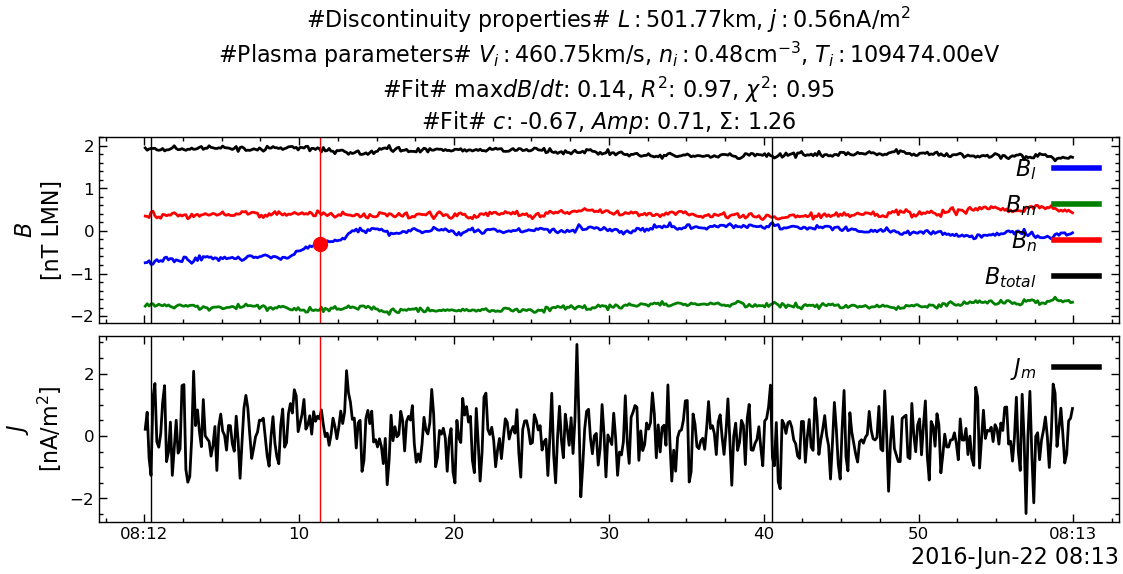

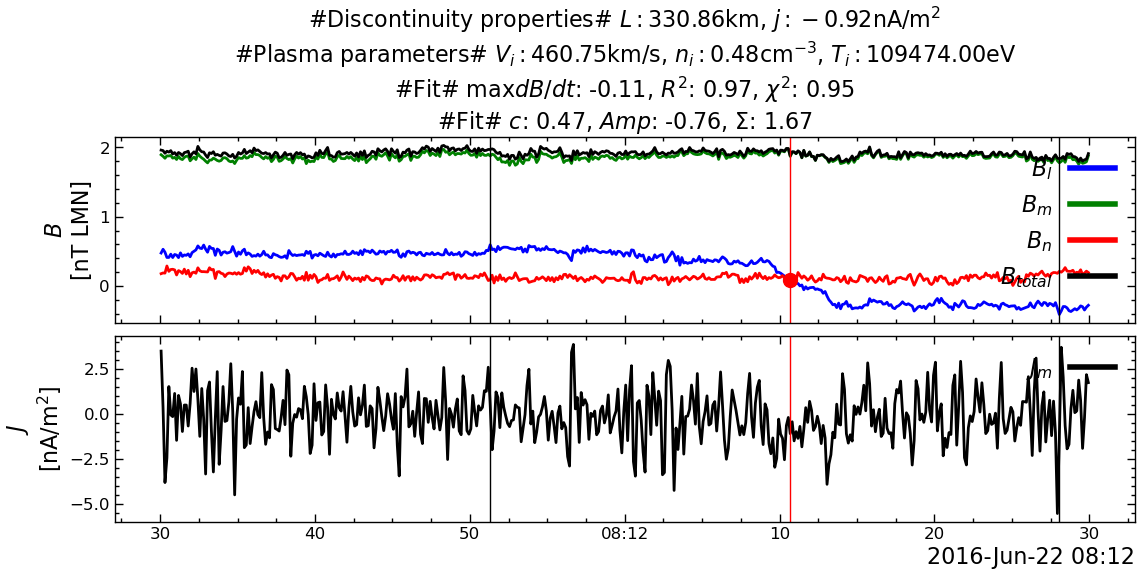

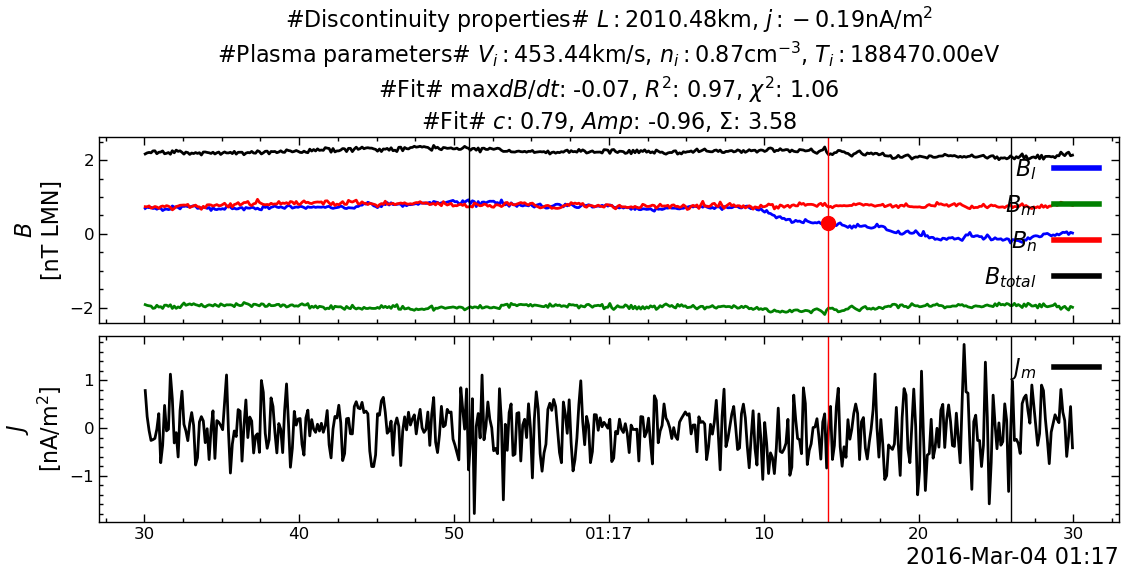

In [77]:
# | layout-ncol: 3
# | column: screen
offset = timedelta(seconds=0)
figs = j_config.plot_candidates(
    num=3,
    add_plasma_params=True,
    offset=offset,
    plot_fit_data=True,
    plot_current_density=True,
    start_col = "tstart",
    end_col = "tstop"
)

## Fitting

In [4]:
j_config = JunoConfig(ts=0.125).load()
j_config.events = j_config.events.with_row_index().filter(
    pl.col("radial_distance") > 5,
    # pl.col("j0_k") > 2
)

04-Mar-24 12:01:19: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.6/migration/

04-Mar-24 12:01:24: deriv_data was applied to: fgm_rot_tot_0-der
04-Mar-24 12:01:25: deriv_data was applied to: fgm_rot_tot_0-der
04-Mar-24 12:01:25: deriv_data was applied to: fgm_rot_tot_0-der


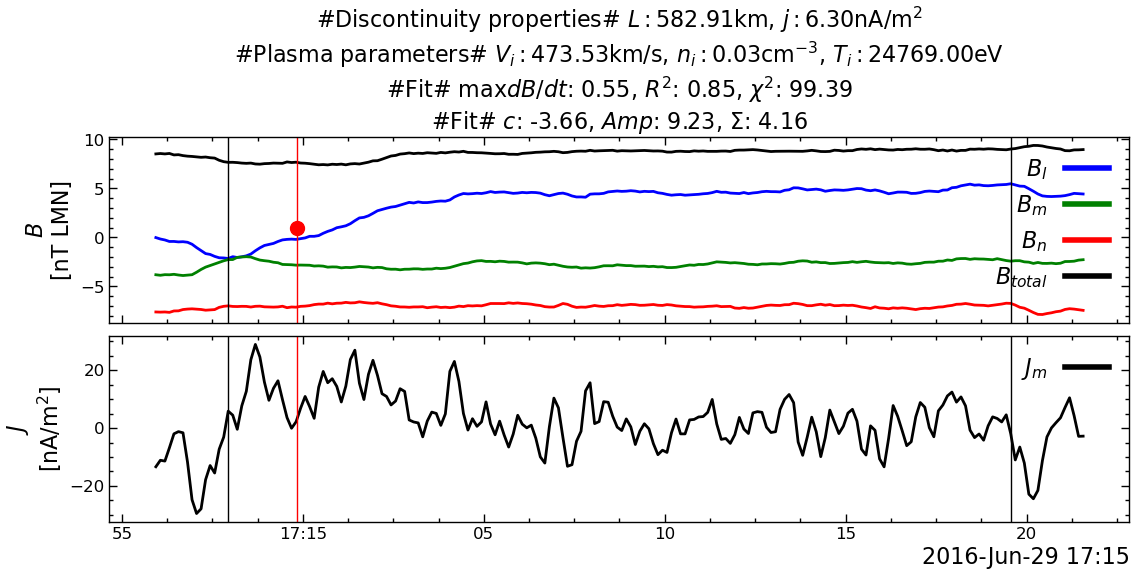

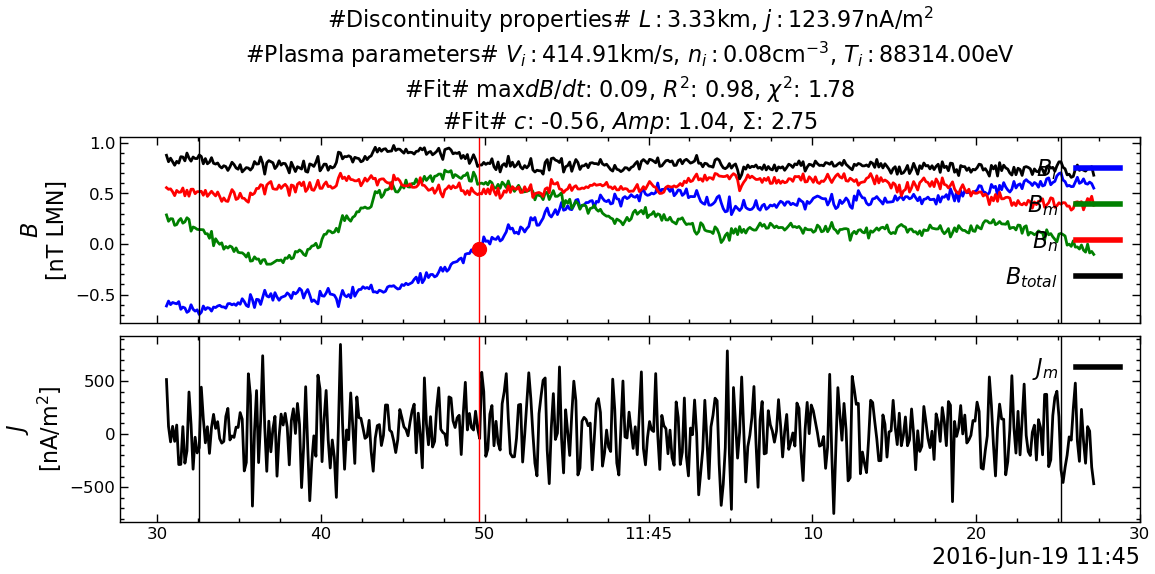

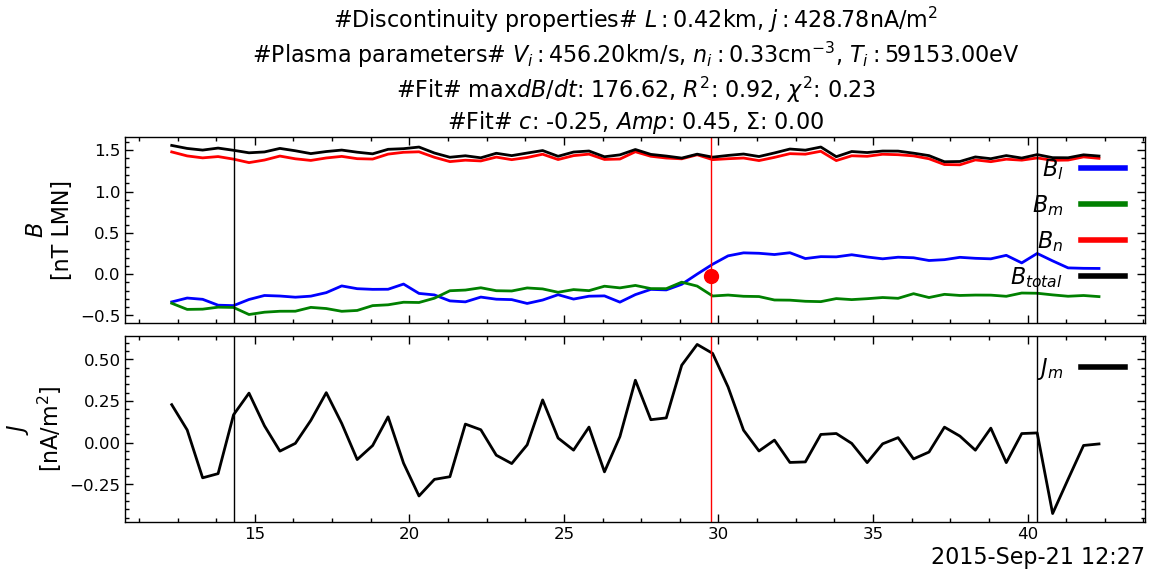

In [48]:
# | layout-ncol: 3
# | column: screen
indices = [72643, 72280, 69537]
offset = timedelta(seconds=2)
figs = j_config.plot_candidates(
    indices=indices,
    offset=offset,
    add_plasma_params=True,
    plot_current_density=True,
    plot_fit_data=True,
)

2024-03-04 14:41:02.337 | INFO     | discontinuitypy.datasets:plot_candidates:243 - Candidates indices: [71263 71875 71222]
04-Mar-24 14:41:02: deriv_data was applied to: fgm_rot_tot_0-der
04-Mar-24 14:41:03: deriv_data was applied to: fgm_rot_tot_0-der
04-Mar-24 14:41:03: deriv_data was applied to: fgm_rot_tot_0-der


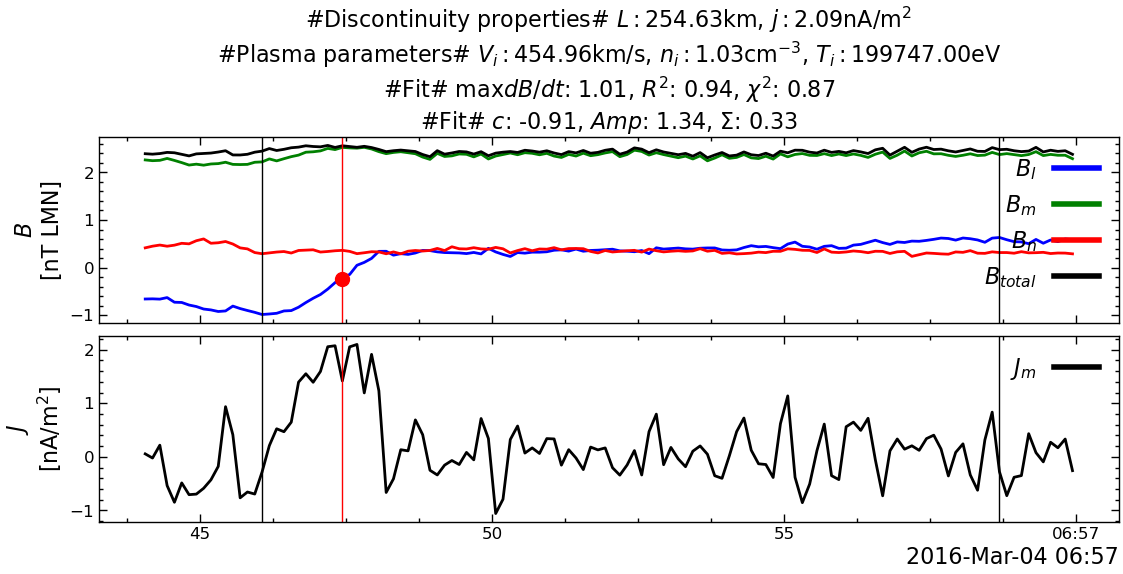

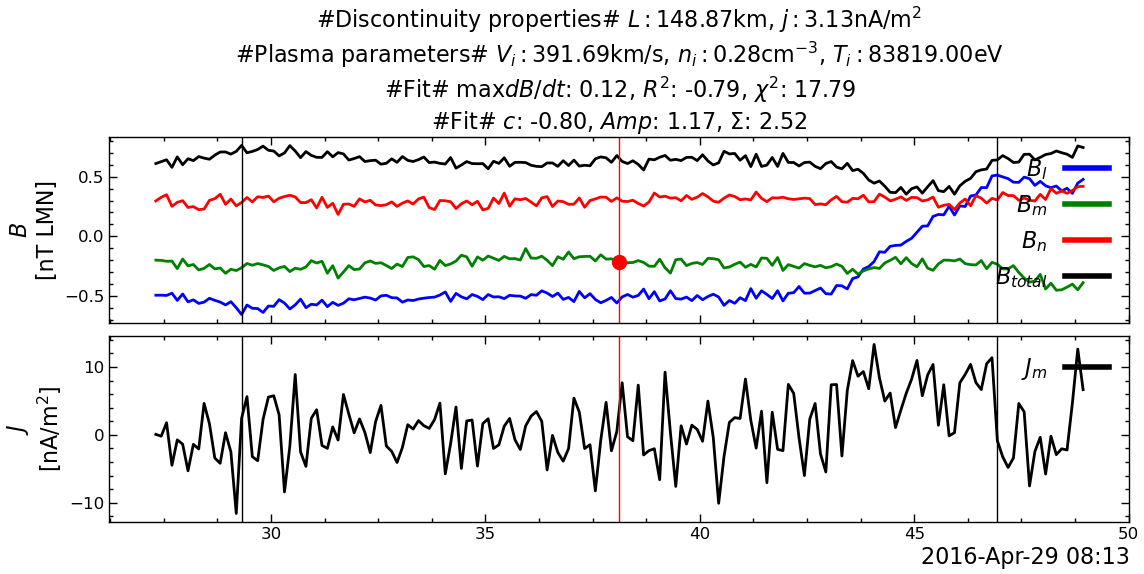

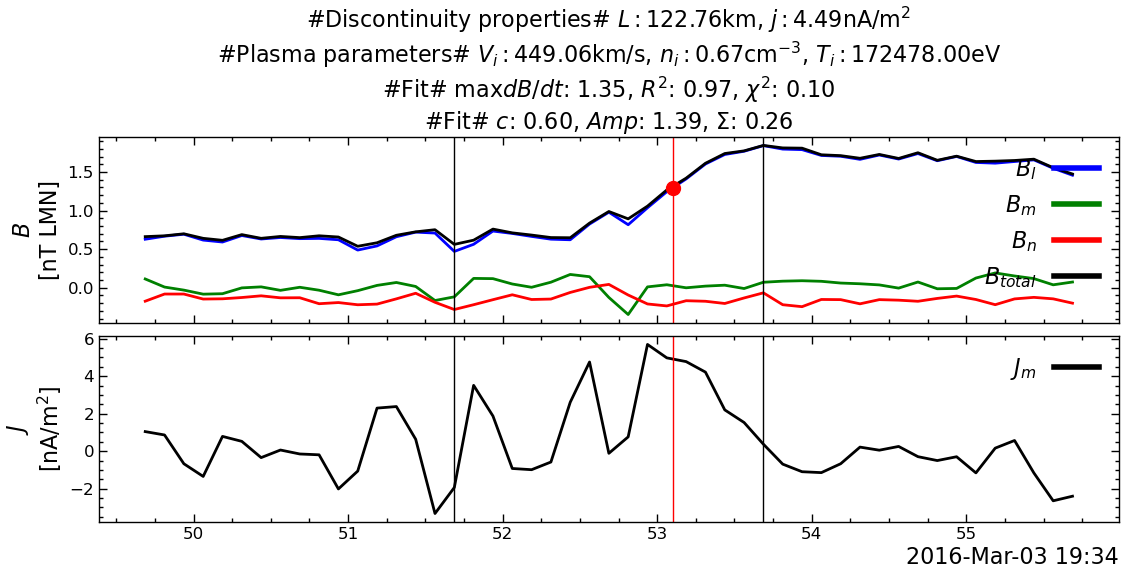

In [12]:
# | layout-ncol: 3
# | column: screen
offset = timedelta(seconds=2)
figs = j_config.plot_candidates(
    num=3,
    add_plasma_params=True,
    offset=offset,
    plot_fit_data=True,
    plot_current_density=True,
)

## Derivative

In [21]:
j_config = JunoConfig(ts=0.125, method='derivative').load()
j_config.events = j_config.events.with_row_index().filter(
    pl.col("radial_distance") > 5,
    pl.col("j0_k") > 4
)

02-Mar-24 16:24:50: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.6/migration/



In [37]:
offset  = timedelta(seconds=2)

02-Mar-24 16:52:58: deriv_data was applied to: fgm_rot_tot_0-der
02-Mar-24 16:52:58: deriv_data was applied to: fgm_rot_tot_0-der
02-Mar-24 16:52:58: deriv_data was applied to: fgm_rot_tot_0-der
02-Mar-24 16:52:59: deriv_data was applied to: fgm_rot_tot_0-der


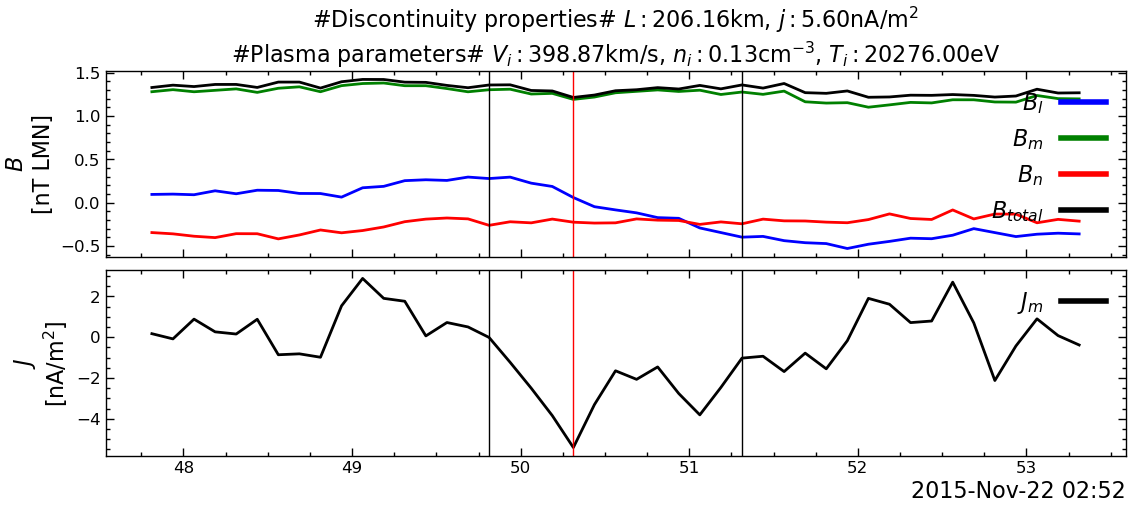

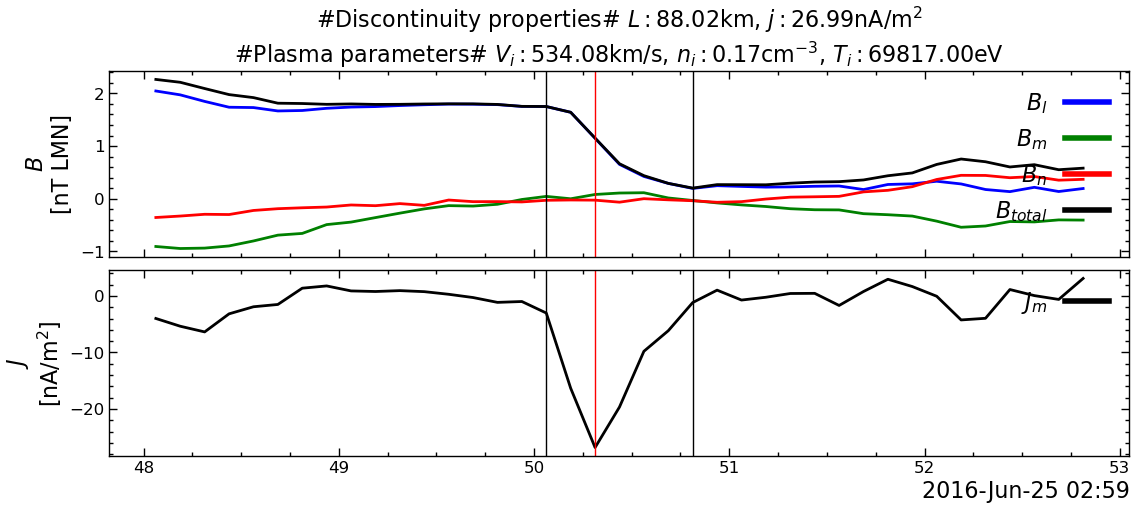

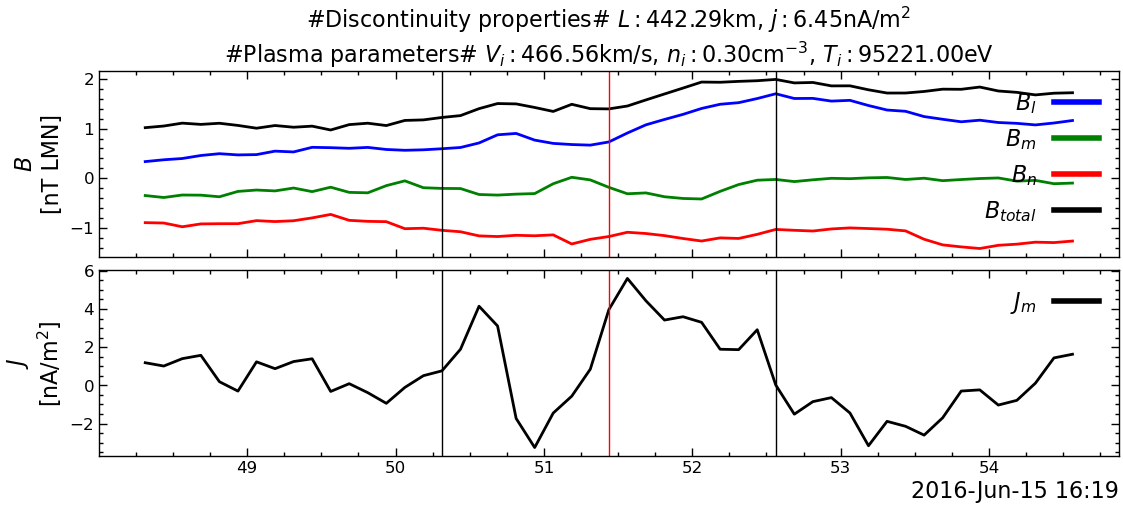

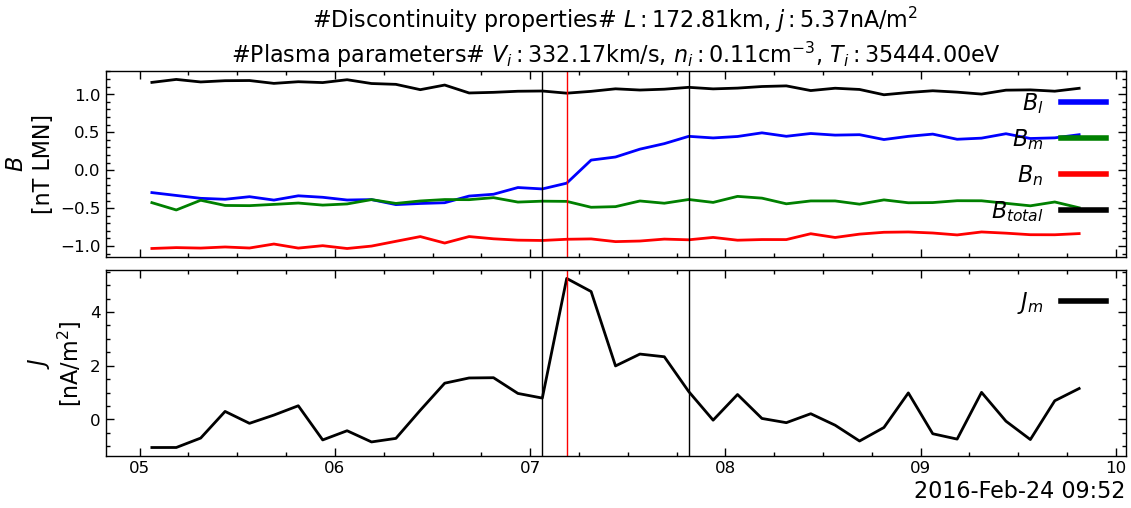

In [33]:
#| layout-ncol: 3
#| column: screen
indices=[91384, 93825, 93618, 92389]
figs = j_config.plot_candidates(indices=indices, add_plasma_params=True, offset=offset, plot_current_density=True)

2024-03-02 16:53:51.076 | INFO     | discontinuitypy.datasets:plot_candidates:243 - Candidates indices: [90260 92835 92303]
02-Mar-24 16:53:51: deriv_data was applied to: fgm_rot_tot_0-der
02-Mar-24 16:53:51: deriv_data was applied to: fgm_rot_tot_0-der
02-Mar-24 16:53:52: deriv_data was applied to: fgm_rot_tot_0-der


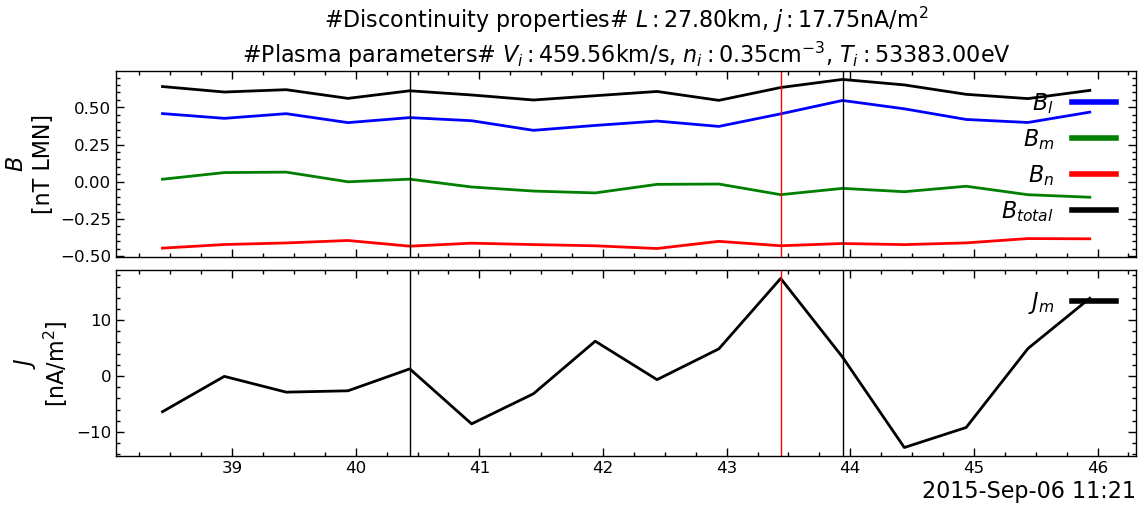

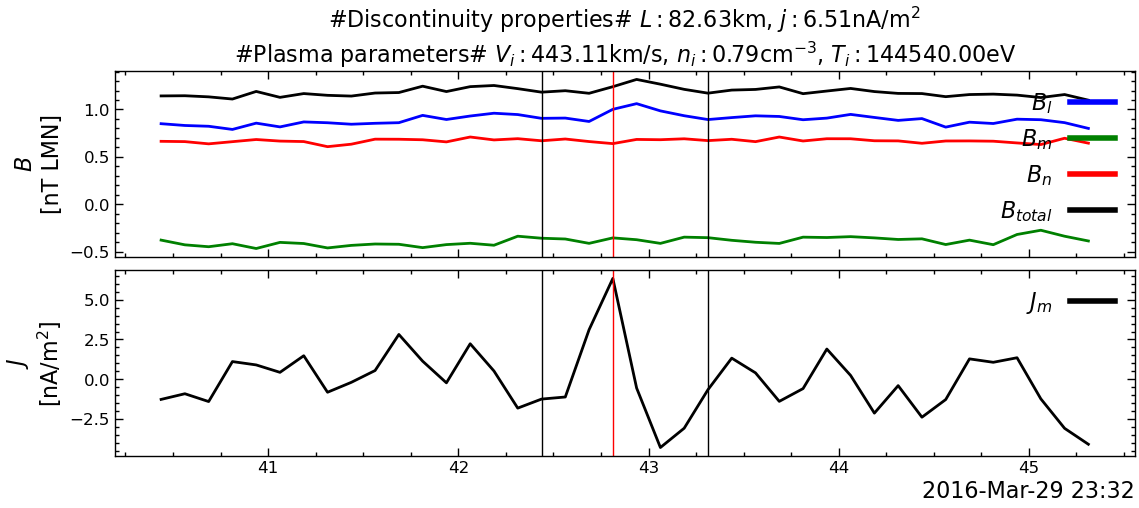

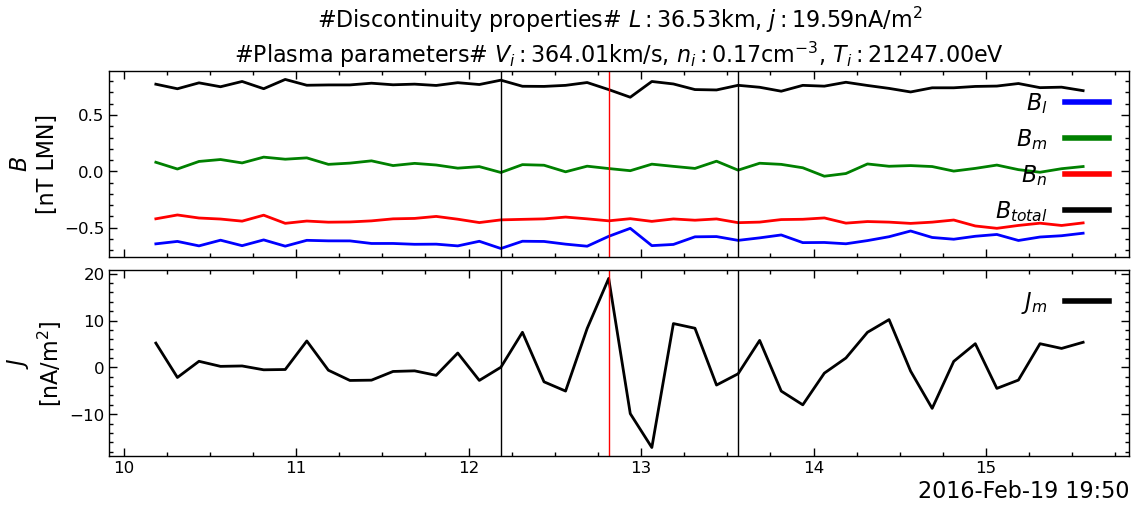

In [39]:
#| layout-ncol: 3
#| column: screen
figs = j_config.plot_candidates(num=3, add_plasma_params=True, offset=offset, plot_current_density=True)

2024-03-02 16:53:24.688 | INFO     | discontinuitypy.datasets:plot_candidates:243 - Candidates indices: [92436 90663 92303 90640 92616 93261 93834 94014 94032 93294 92471 92343
 92972 93732 92478]


KeyboardInterrupt: 

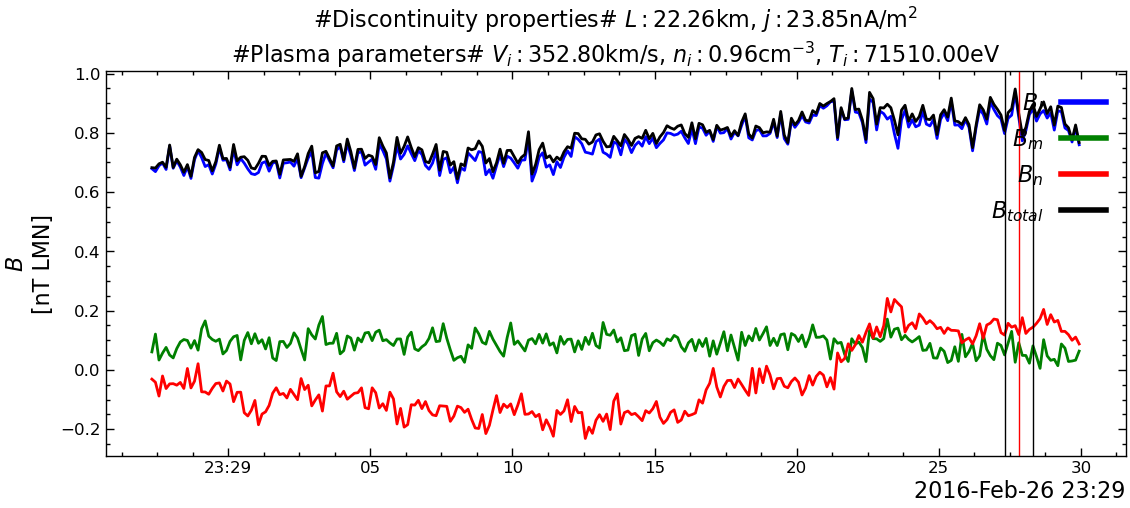

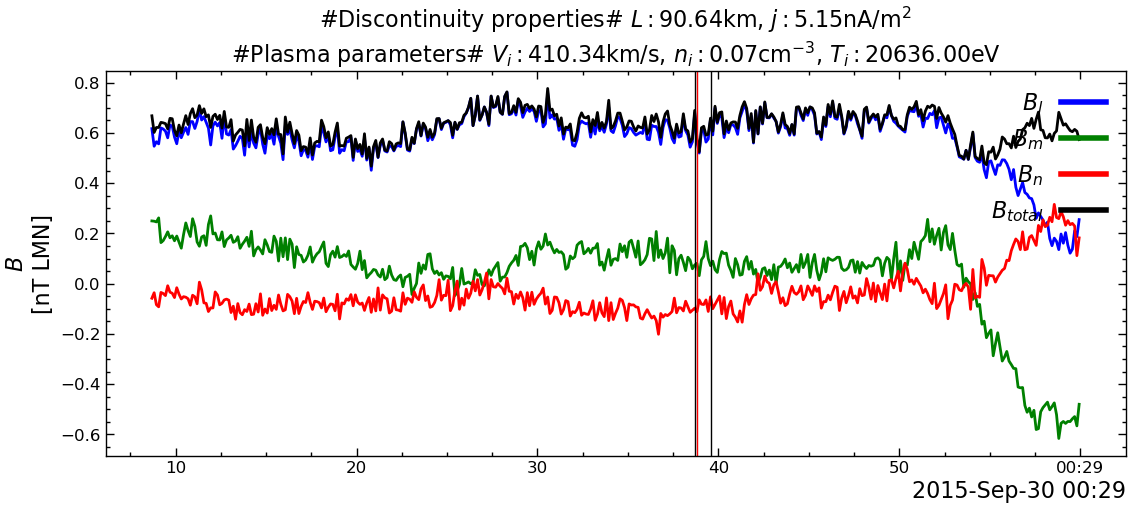

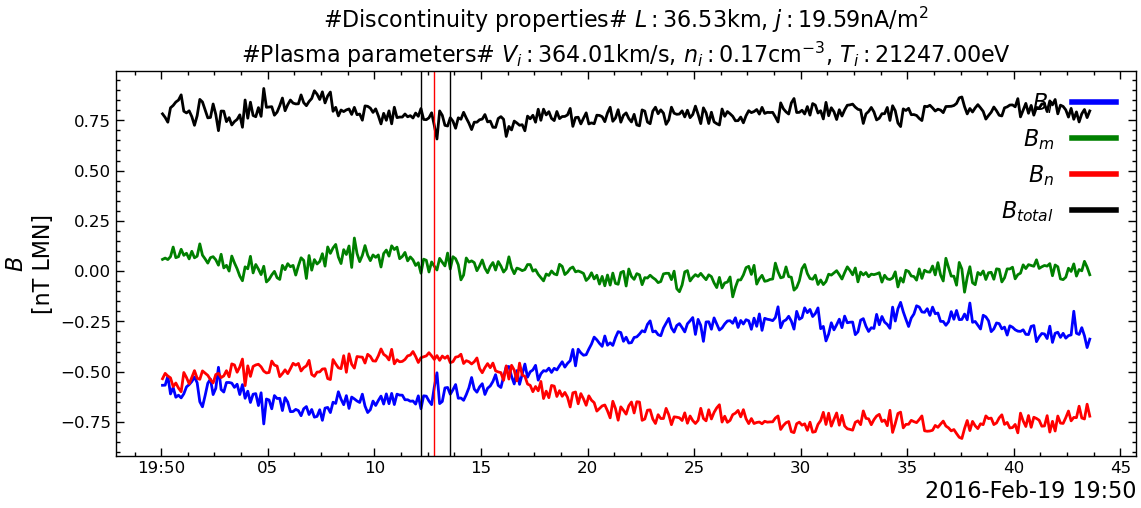

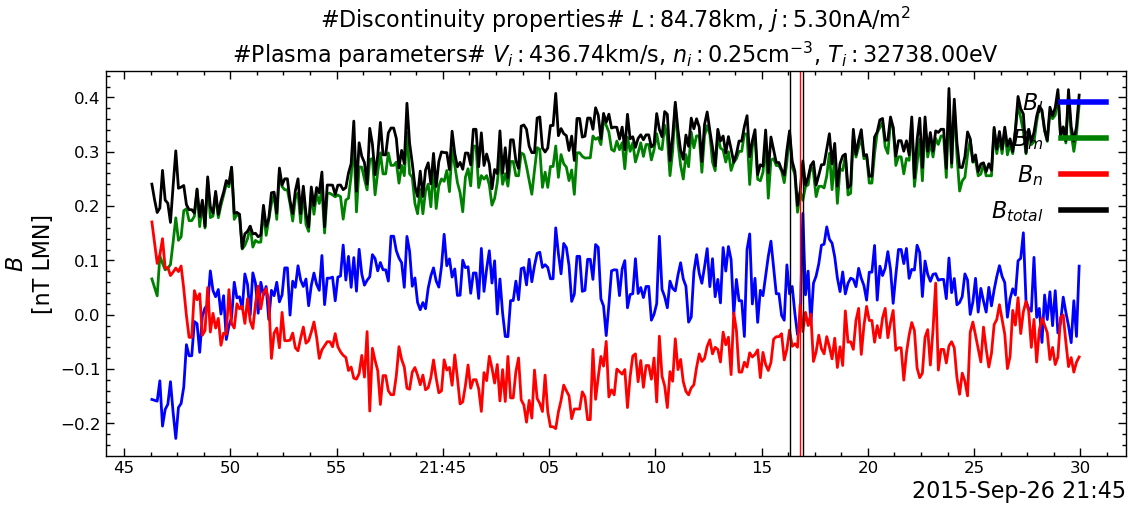

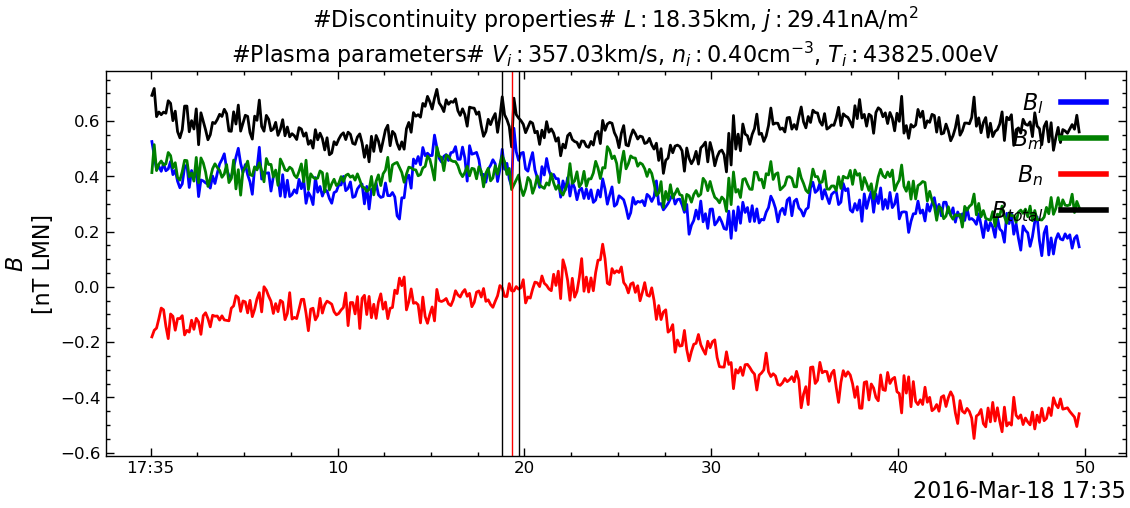

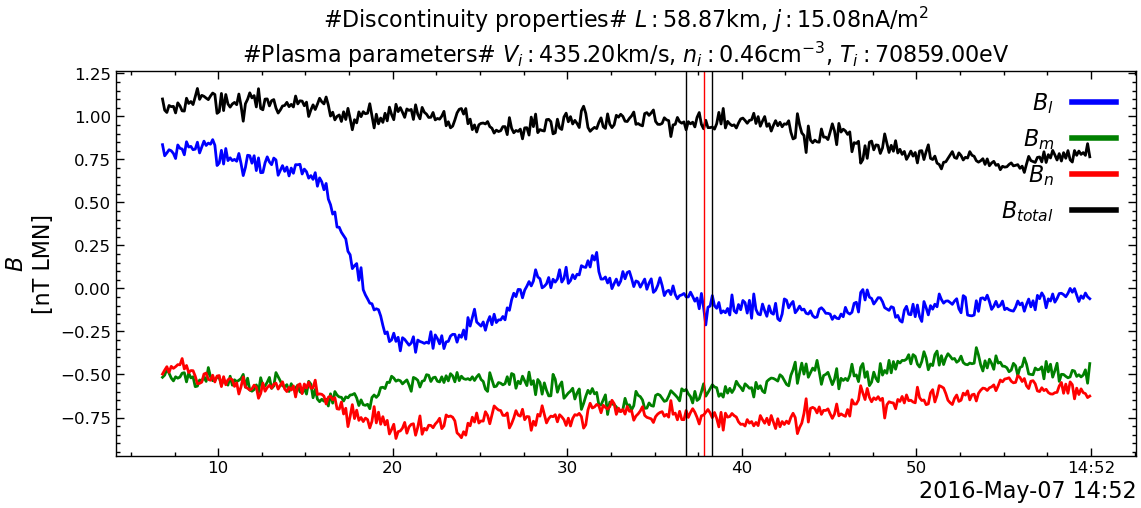

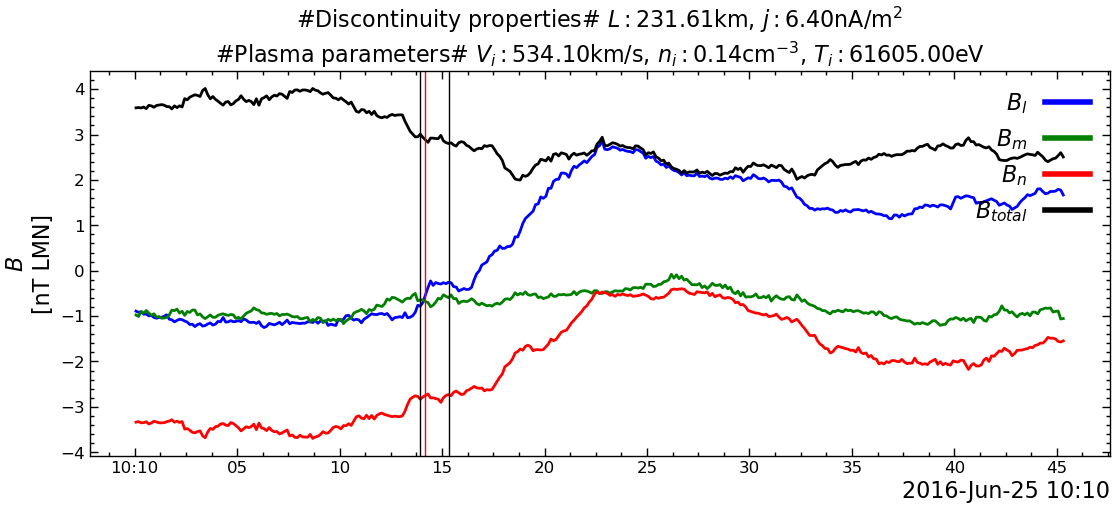

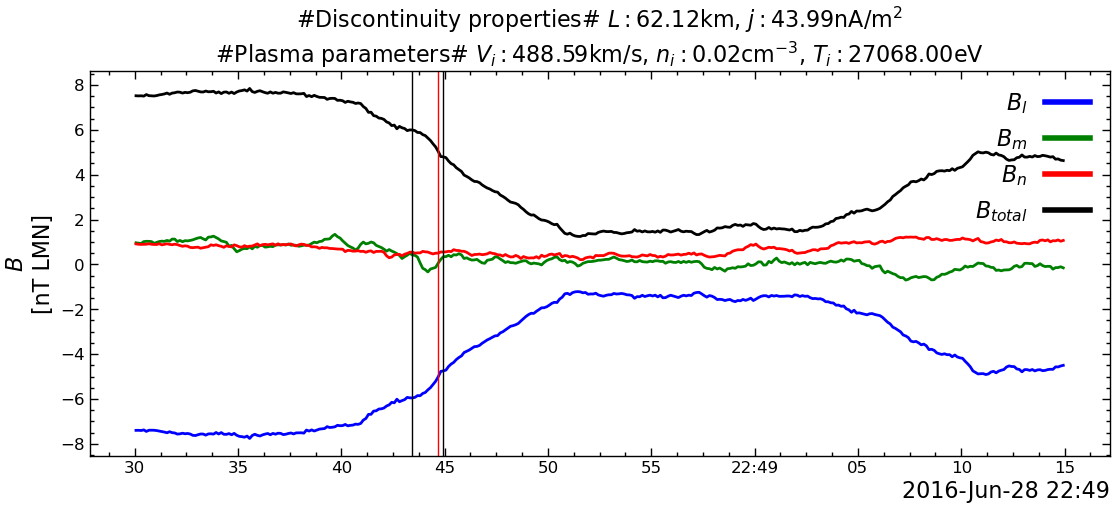

In [35]:
#| layout-ncol: 3
#| column: screen
offset  = timedelta(seconds=30)
figs = j_config.plot_candidates(num=15, add_plasma_params=True, offset=offset)